In [1]:
import tensorflow as tf
from tensorflow.keras.backend import softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
print('Imports Successful.')

Imports Successful.


In [2]:
def show_image(arr):
    plt.imshow(arr, 'gray')
    plt.show()

In [3]:
CATEGORIES = list(map(chr, range(ord('A'), ord('Z'))))
CATEGORIES.pop(9)

'J'

In [4]:
def predict(img):
    prediction = model.predict_classes(img.reshape(1, 128, 128, 1))
    print("Prediction:", CATEGORIES[np.squeeze(prediction)])
    show_image(img)

In [5]:
def mask_skin(frame, visualize_steps= False):
    converted2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
    skinMask = cv2.addWeighted(skinMask,0.5,skinMask,0.5,0.0)
    skinMask = cv2.medianBlur(skinMask, 5)
    
    skin = cv2.bitwise_and(converted2, converted2, mask = skinMask)
    
    if visualize_steps:
        show_image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        show_image(converted)
        show_image(converted2)
        show_image(skinMask)
    
    return skin

In [6]:
def process_image(img_array, visualize_steps= False):
    frame = cv2.resize(img_array, (128, 128))
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    skin = mask_skin(frame, visualize_steps)
    
    edges = cv2.Canny(skin,60,60)
    
    if visualize_steps:
        print("path:", path)
        print("shape:", img_array.shape)
        show_image(skin)
        show_image(edges)
            
    cv2.destroyAllWindows()
    return edges

In [7]:
model = tf.keras.models.load_model('mod')

Prediction: E


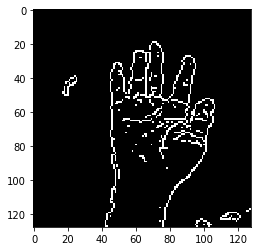

In [8]:
p = r'C:\Users\jyoth\OneDrive\Pictures\Camera Roll\five.jpg'
image = cv2.imread(p)
edges = process_image(image)
predict(edges)

Prediction: N


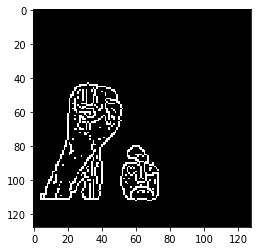

In [9]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 

while(True):
    ret,frame = cap.read() # return a single frame in variable `frame`
    cv2.imshow('img1',frame) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y'
        break

cap.release()
cv2.destroyAllWindows()

edges = process_image(frame)
predict(edges)